In [1]:
"""Auction mutation analysis"""

from __future__ import annotations

import json
from typing import List

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

matplotlib.rcParams['font.family'] = "monospace"
%matplotlib inline

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from core.core import decode_filename, save_plot, analysis_filename, ImageFormat

In [10]:
basic = [
    "mutate_iterative_auction_basic_j12_s2_0",
    "mutate_iterative_auction_basic_j15_s2_0",
    "mutate_iterative_auction_basic_j15_s3_0",
    "mutate_iterative_auction_basic_j25_s5_0"
]

paper = [
    "mutate_iterative_auction_fog_j15_s3_0",
    "mutate_iterative_auction_fog_j25_s5_0"
]

encoded_filenames = paper
folder = 'paper'
y_axis = 'Mutate Difference' 
title = 'Effect of job misrepresentation on prices'

In [11]:
data = []
model_names = []

for encoded_filename in encoded_filenames:
    filename, model_name, test_name = decode_filename(folder, encoded_filename)
    model_names.append(model_name)
    
    with open(filename) as file:
        file_data = json.load(file)

        for pos, result in enumerate(file_data):
            for mutation_name, mutation_results in result.items():
                if mutation_name == "no mutation":
                    data.append((pos, model_name, "No Mutation", mutation_results['total money'], 0, 0, 0, mutation_results['total_iterations']))
                else:
                    if mutation_results['mutant_value'] - mutation_results['mutated_value'] > 0:
                        print(mutation_results)
                    data.append((pos, model_name, "Mutation", mutation_results['total money'],
                                 mutation_results['mutant_value'], mutation_results['mutated_value'],                                     
                                 mutation_results['mutant_value'] - mutation_results['mutated_value'],
                                 mutation_results['total_iterations']))


In [12]:
df = pd.DataFrame(data, columns=['Pos', 'Model', 'Mutation', 'Total Money', 'Mutant Value', 'Mutated Value',
                                 'Mutate Difference', 'Iterations'])
df

,Pos,Model,Mutation,Total Money,Mutant Value,Mutated Value,Mutate Difference,Iterations
0,0,Jobs: 15 Servers: 3,No Mutation,582,0,0,0,237
1,0,Jobs: 15 Servers: 3,Mutation,534,6,42,-36,230
2,0,Jobs: 15 Servers: 3,Mutation,488,6,40,-34,209
3,0,Jobs: 15 Servers: 3,Mutation,570,2,40,-38,232
4,0,Jobs: 15 Servers: 3,Mutation,564,4,40,-36,227
...,...,...,...,...,...,...,...,...
104,3,Jobs: 25 Servers: 5,Mutation,714,2,34,-32,309
105,3,Jobs: 25 Servers: 5,Mutation,700,8,34,-26,299
106,3,Jobs: 25 Servers: 5,Mutation,736,4,20,-16,314
107,3,Jobs: 25 Servers: 5,Mutation,722,2,34,-32,313


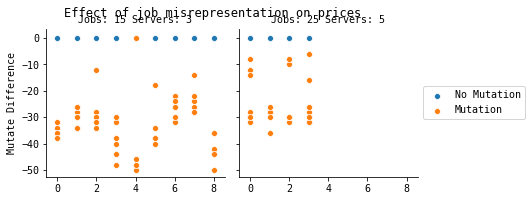

In [13]:
g = sns.FacetGrid(df, col='Model', col_wrap=2, hue='Mutation')
g = (g.map(sns.scatterplot, 'Pos', y_axis)
     .set_titles("{col_name}").set_xlabels(""))
plt.legend(loc='center left',bbox_to_anchor=(1,0.5))

g.fig.subplots_adjust(top=0.88)
g.fig.suptitle(title)

g

